In [394]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer

In [395]:
df_train=pd.read_csv("train_Df64byy.csv")
df_test=pd.read_csv("test_YCcRUnU.csv")

In [396]:
df_train.sample(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
15479,15480,C29,1695,Owned,Joint,43,42,Yes,X2,6.0,1.0,10,16335.0,0
6366,6367,C19,423,Owned,Individual,73,73,No,X2,NaN,NaN,19,20774.0,0
40297,40298,C9,401,Rented,Individual,27,27,No,X1,5.0,3.0,14,6720.0,0
9035,9036,C11,1909,Owned,Individual,73,73,No,NaN,6.0,4.0,19,18912.0,0
8992,8993,C8,212,Owned,Joint,40,36,Yes,NaN,2.0,3.0,17,23884.8,0
43987,43988,C21,4932,Rented,Individual,46,46,No,X5,6.0,3.0,14,12660.0,0
45198,45199,C8,4201,Owned,Joint,74,73,Yes,X2,13.0,3.0,18,35078.4,0
23282,23283,C2,632,Owned,Individual,46,46,No,X1,14+,3.0,16,13156.0,0
30159,30160,C13,396,Owned,Individual,75,75,No,NaN,NaN,NaN,21,22990.0,1
48843,48844,C17,4355,Owned,Joint,59,17,No,X3,2.0,1.0,2,25662.0,1


In [397]:
df_test.sample(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
4475,55358,C3,333,Owned,Individual,26,26,No,X3,NaN,NaN,6,6960.0
11679,62562,C2,3844,Owned,Individual,65,65,No,X3,7.0,3.0,11,20468.0
4203,55086,C4,1334,Rented,Individual,24,24,No,X1,3.0,2.0,8,10688.0
11670,62553,C17,4268,Rented,Individual,50,50,No,X1,1.0,1.0,22,12900.0
11674,62557,C3,64,Rented,Individual,61,61,No,X4,14+,3.0,21,16008.0
2027,52910,C2,17,Owned,Joint,33,30,Yes,X1,NaN,NaN,11,11760.0
17332,68215,C34,1012,Rented,Individual,25,25,No,NaN,5.0,2.0,6,6090.0
3994,54877,C25,2365,Rented,Joint,75,59,No,NaN,10.0,3.0,21,32232.0
5217,56100,C4,1199,Rented,Individual,25,25,No,X2,NaN,NaN,9,10256.0
21202,72085,C3,13,Rented,Individual,43,43,No,NaN,NaN,NaN,12,14762.0


In [398]:
#Dropping unwanted ID column
df_train.drop("ID",axis=1,inplace=True)
df_test.drop("ID",axis=1,inplace=True)

In [399]:
df_train.shape

(50882, 13)

In [400]:
df_test.shape

(21805, 12)

In [401]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                50882 non-null  object 
 1   Region_Code              50882 non-null  int64  
 2   Accomodation_Type        50882 non-null  object 
 3   Reco_Insurance_Type      50882 non-null  object 
 4   Upper_Age                50882 non-null  int64  
 5   Lower_Age                50882 non-null  int64  
 6   Is_Spouse                50882 non-null  object 
 7   Health Indicator         39191 non-null  object 
 8   Holding_Policy_Duration  30631 non-null  object 
 9   Holding_Policy_Type      30631 non-null  float64
 10  Reco_Policy_Cat          50882 non-null  int64  
 11  Reco_Policy_Premium      50882 non-null  float64
 12  Response                 50882 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 5.0+ MB


In [402]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City_Code                21805 non-null  object 
 1   Region_Code              21805 non-null  int64  
 2   Accomodation_Type        21805 non-null  object 
 3   Reco_Insurance_Type      21805 non-null  object 
 4   Upper_Age                21805 non-null  int64  
 5   Lower_Age                21805 non-null  int64  
 6   Is_Spouse                21805 non-null  object 
 7   Health Indicator         16778 non-null  object 
 8   Holding_Policy_Duration  13202 non-null  object 
 9   Holding_Policy_Type      13202 non-null  float64
 10  Reco_Policy_Cat          21805 non-null  int64  
 11  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 2.0+ MB


# Descriptive Statistics

In [403]:
df_train.describe(include="object")

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
count,50882,50882,50882,50882,39191,30631
unique,36,2,2,2,9,15
top,C1,Owned,Individual,No,X1,1.0
freq,8973,27951,40536,42460,13010,4499


In [404]:
df_train.describe()

,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


# Checking for Duplicates

In [405]:
df_train.drop_duplicates(keep='first',inplace=True)

In [406]:
df_test.drop_duplicates(keep='first',inplace=True)

# Checking for missing values

In [407]:
df_train.isna().sum()

City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [408]:
df_test.isna().sum()

City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8602
Holding_Policy_Type        8602
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [409]:
#checking number of unique values before deciding strategy to impute
df_train.loc[:,["Health Indicator","Holding_Policy_Duration","Holding_Policy_Type"]].nunique()

Health Indicator            9
Holding_Policy_Duration    15
Holding_Policy_Type         4
dtype: int64

In [410]:
df_test.loc[:,["Health Indicator","Holding_Policy_Duration","Holding_Policy_Type"]].nunique()

Health Indicator            9
Holding_Policy_Duration    15
Holding_Policy_Type         4
dtype: int64

### imputing missing values 

In [411]:
#using SimpleImputer to impute missing values in categorical columns with strategy as most frequent

impute=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_train.loc[:,["Health Indicator","Holding_Policy_Type"]]=impute.fit_transform(df_train.loc[:,["Health Indicator","Holding_Policy_Type"]]).astype('str')
df_test.loc[:,["Health Indicator","Holding_Policy_Type"]]=impute.fit_transform(df_test.loc[:,["Health Indicator","Holding_Policy_Type"]]).astype('str')

In [412]:
#using SimpleImputer to impute missing values in numerical column with strategy as median
df_train.loc[:,["Holding_Policy_Duration"]]=df_train.loc[:,["Holding_Policy_Duration"]].replace("14+","14").astype("float")
df_test.loc[:,["Holding_Policy_Duration"]]=df_test.loc[:,["Holding_Policy_Duration"]].replace("14+","14").astype("float")
impute=SimpleImputer(missing_values=np.nan,strategy='median')
df_train.loc[:,["Holding_Policy_Duration"]]=impute.fit_transform(df_train.loc[:,["Holding_Policy_Duration"]])
df_test.loc[:,["Holding_Policy_Duration"]]=impute.fit_transform(df_test.loc[:,["Holding_Policy_Duration"]])

In [413]:
df_train.isna().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [414]:
df_test.isna().sum()

City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [415]:
df_train["Response"].value_counts(normalize=True)

0    0.760053
1    0.239947
Name: Response, dtype: float64

In [416]:
df_train = df_train.rename(columns={'Health Indicator': 'Health_Indicator'})
df_test = df_test.rename(columns={'Health Indicator': 'Health_Indicator'})
df_train["Region_Code"]=df_train["Region_Code"].astype("object")
df_test["Region_Code"]=df_test["Region_Code"].astype("object")

- this is an imbalanced dataset

## Data visualizations
 ### Target Variable

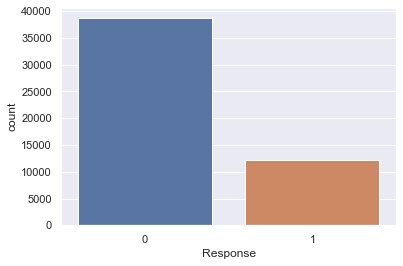

In [93]:

sns.set_theme(style="darkgrid")
sns.countplot(df_train['Response'],data=df_train)

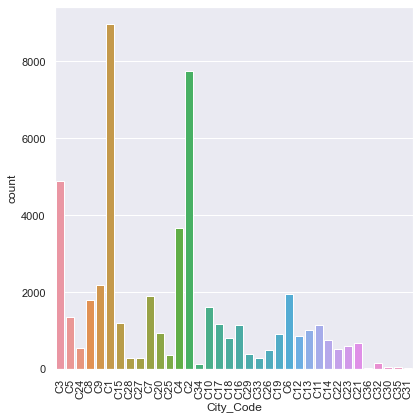

In [134]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(df_train['City_Code'],data=df_train)
plt.xticks(rotation=90)
plt.tight_layout()

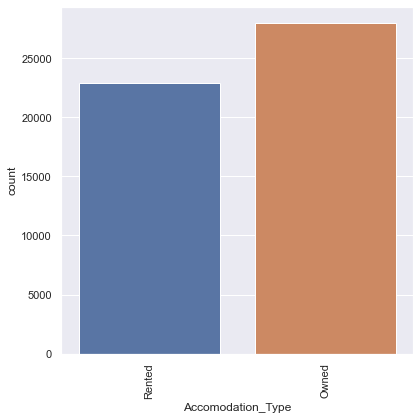

In [136]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(df_train['Accomodation_Type'],data=df_train)
plt.xticks(rotation=90)
plt.tight_layout()

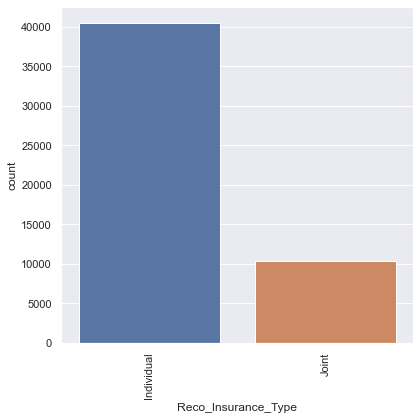

In [137]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(df_train['Reco_Insurance_Type'],data=df_train)
plt.xticks(rotation=90)
plt.tight_layout()

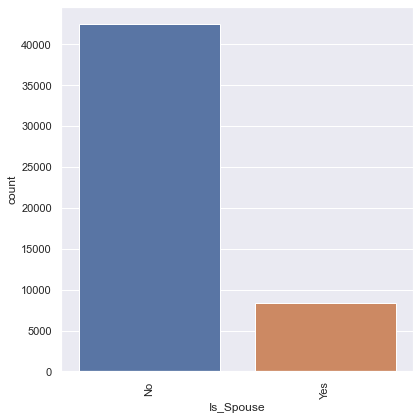

In [138]:

plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(df_train['Is_Spouse'],data=df_train)
plt.xticks(rotation=90)
plt.tight_layout()

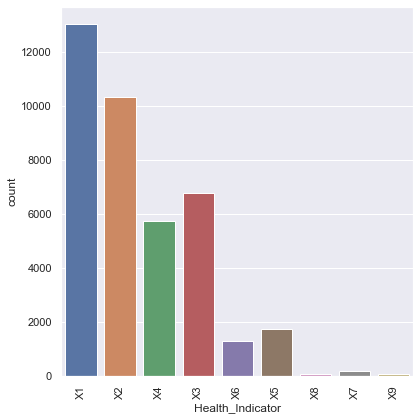

In [160]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(df_train['Health_Indicator'],data=df_train)
plt.xticks(rotation=90)
plt.tight_layout()

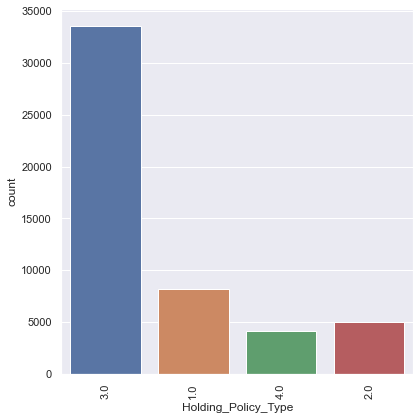

In [140]:

plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(df_train['Holding_Policy_Type'],data=df_train)
plt.xticks(rotation=90)
plt.tight_layout()

In [142]:
df_train.select_dtypes(include=np.number).columns.tolist()

['Region_Code',
 'Upper_Age',
 'Lower_Age',
 'Holding_Policy_Duration',
 'Reco_Policy_Cat',
 'Reco_Policy_Premium',
 'Response']

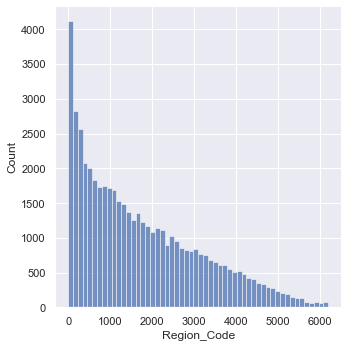

In [143]:
sns.displot(df_train["Region_Code"])

## Data Pre-Processing

### OneHotEncoding 

In [417]:
def add_noise(series,noise_level):
    return series *(1+noise_level*np.random.randn(len(series)))

def target_encode(trn_series=None,tst_series=None,target=None,min_samples_leaf=1,smoothing=1,noise_level=0):
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
    trn_series.to_frame(trn_series.name),
    averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),on=trn_series.name,how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_tst_series = pd.merge(tst_series.to_frame(tst_series.name),averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),on=tst_series.name,how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

tr_g, te_g = target_encode(df_train["Region_Code"],df_test["Region_Code"],target= df_train["Response"],min_samples_leaf=200,smoothing=20,noise_level=0.02)
df_train['Region_code_me']=tr_g
df_test['Region_code_me']=te_g

In [423]:
df_train.drop("Region_Code",axis=1,inplace=True)
df_test.drop("Region_Code",axis=1,inplace=True)

In [427]:
# Deleting the one of the encoded columns for categorical variable with only two categories and keeping all the encoded columns of 
# of categorical variable with more than 2 variable and equal to 4 categorical variable
# for feature with levels greater than 9 to avoid high dimensionality problem using target encoding concept manually by implementing 
# smoothening of mean.
# in Target encoding for each distinct element feature you compute the average of the corresponding values in target. 
# Then you replace each with the according mean.this technique has a problem of overfitting.thus using smoothed mean can combatr this
# problem to some extint  

#using get _dummies
for cols in df_train.select_dtypes(include="object").columns:
        if df_train[cols].nunique()==2:
            df_train=pd.get_dummies(df_train,columns=[cols],drop_first=True)
        elif df_train[cols].nunique()>2 :
            df_train=pd.get_dummies(df_train,columns=[cols])

In [429]:
for cols in df_test.select_dtypes(include="object").columns:
        if df_test[cols].nunique()==2:
            df_test=pd.get_dummies(df_test,columns=[cols],drop_first=True)
        elif df_test[cols].nunique()>2 :
            df_test=pd.get_dummies(df_test,columns=[cols])

In [483]:
X=df_train.drop("Response",axis=1)
y=df_train["Response"]
from imblearn.pipeline import pipeline,make_pipeline
from imblearn.over_sampling import SMOTE
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1)
model=make_pipeline( SMOTE(),DecisionTreeClassifier(random_state=42))
X_train_res,y_train_res=sm.fit_resample(X_train,y_train)

In [484]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y)
dtree=DecisionTreeClassifier(criterion='gini')


In [485]:
dtree.fit(X_train_res,y_train_res)

DecisionTreeClassifier()

===============Classification Report============
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      7682
           1       0.29      0.31      0.30      2495

    accuracy                           0.65     10177
   macro avg       0.53      0.53      0.53     10177
weighted avg       0.66      0.65      0.65     10177



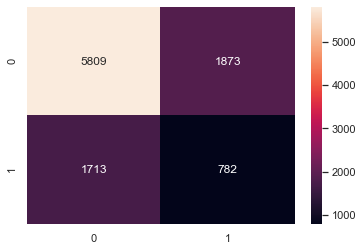

In [486]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=dtree.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f')
print("===============Classification Report============")
print(classification_report(y_test,y_pred))

In [492]:
from sklearn.model_selection import GridSearchCV
param_grid={
            'decisiontreeclassifier__criterion':["gini",'entropy'],
            'decisiontreeclassifier__max_depth':[3,4,5,6,7,8,9,10],
            "decisiontreeclassifier__min_samples_split":[5,10,20],
            'decisiontreeclassifier__min_samples_leaf':[1,2,3,4,5,6],
            'decisiontreeclassifier__min_impurity_decrease':[0.001,0.01,0.1,.005]
}
dtree_grid=GridSearchCV(model,param_grid=param_grid,cv=5,scoring="roc_auc")

In [493]:
dtree_grid.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [3, 4, 5, 6, 7, 8,
                                                               9, 10],
                         'decisiontreeclassifier__min_impurity_decrease': [0.001,
                                                                           0.01,
                                                                           0.1,
                                                                           0.005],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 3,
                                                                     

In [494]:
y_pred=dtree_grid.best_estimator_.predict(X_test)

======= Classification Report GRIDSEARCH DecisionTree Classifier===============
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      7682
           1       0.28      0.12      0.17      2495

    accuracy                           0.71     10177
   macro avg       0.52      0.51      0.50     10177
weighted avg       0.64      0.71      0.66     10177



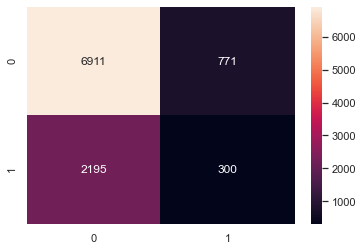

In [495]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f')
print("======= Classification Report GRIDSEARCH DecisionTree Classifier===============")
print(classification_report(y_test,y_pred))

In [496]:
df_train


,Upper_Age,Lower_Age,Holding_Policy_Duration,Reco_Policy_Cat,Reco_Policy_Premium,Response,Region_code_me,City_Code_C1,City_Code_C10,City_Code_C11,...,Health_Indicator_X4,Health_Indicator_X5,Health_Indicator_X6,Health_Indicator_X7,Health_Indicator_X8,Health_Indicator_X9,Holding_Policy_Type_1.0,Holding_Policy_Type_2.0,Holding_Policy_Type_3.0,Holding_Policy_Type_4.0
0,36,36,14.0,22,11628.0,0,0.234394,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,75,22,5.0,22,30510.0,0,0.240109,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,32,32,1.0,19,7450.0,1,0.244068,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,52,48,14.0,19,17780.0,0,0.237470,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,44,44,3.0,16,10404.0,0,0.238273,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,22,22,5.0,18,7704.0,0,0.243621,0,0,0,...,0,0,0,0,0,0,0,0,1,0
50878,27,27,7.0,4,5408.0,0,0.233741,0,0,0,...,0,0,0,0,0,0,0,0,1,0
50879,63,63,14.0,12,11374.0,0,0.237155,1,0,0,...,0,0,0,0,0,0,1,0,0,0
50880,71,49,2.0,16,28179.2,1,0.245576,1,0,0,...,0,0,0,0,0,0,0,1,0,0
